## The dataset is taken from [BHDD Repository](https://github.com/baseresearch/BHDD)

In [2]:
import pickle
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Conv2D, MaxPooling2D, \
    Dropout, BatchNormalization, AveragePooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import Adam

dataset = []

with open("/content/gdrive/My Drive/data.pkl","rb") as file:
    dataset = pickle.load(file)
            
trainDataset = dataset["trainDataset"]
testDataset = dataset["testDataset"]

X_train = np.array([list(td["image"].flatten() / 255) for td in trainDataset])
Y_train = np.array([td["label"] for td in trainDataset])
X_test = np.array([list(td["image"].flatten() / 255) for td in testDataset])
Y_test = np.array([td["label"] for td in testDataset])

Using TensorFlow backend.


In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(27561, 28, 28, 1)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

### A Convolutional Neural Network is trained with the training dataset of 60000 images

In [0]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# train model

hist = model.fit(X_train, Y_train,validation_split = 0.1, epochs=50)

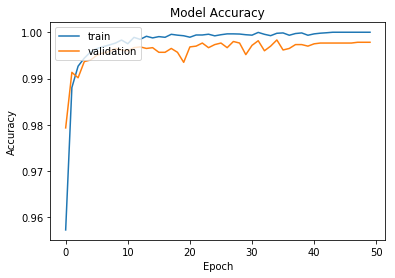

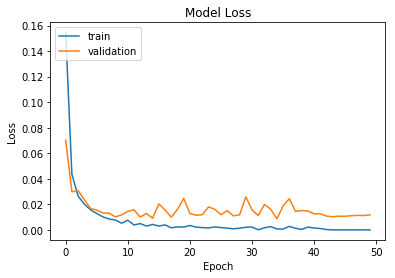

In [5]:
def plotacc():
  plt.plot(hist.history['acc'])
  plt.plot(hist.history['val_acc'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

plotacc()

In [6]:
from keras.models import model_from_json
import os

model_json = model.to_json()
with open(F"/content/gdrive/My Drive/model.json", 'w') as json_file:
    json_file.write(model_json)

# serialize weights to HDF5

model.save_weights(F"/content/gdrive/My Drive/model.h5")
print('Saved model to disk')

Saved model to disk


#### The Accuracy of the model on the test dataset is about 99.7% which is pretty accurate despite some of the data being very noisy

In [7]:
model.evaluate(X_test, Y_test)

27561/27561 [==============================] - 1s 53us/step


[0.02912936610794929, 0.9966256667029498]

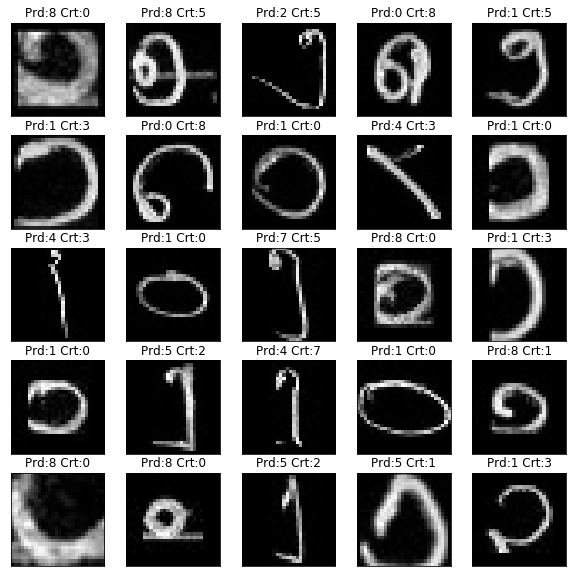

In [8]:
#finds images that the model predicted wrong        
def finderrors(model):
    indexarr = []
    predictions=model.predict(X_test)
    i = 0
    while i<10000:
        if np.argmax(predictions[i])!=np.argmax(Y_test[i]):
            indexarr.append(i)
        i+=1
    return predictions, indexarr

#shows images that model predicted wrong
def showerrors():
    p, i = finderrors(model)
    leng = range(len(i))
    t = 0
    #range to be adjusted properly since there are many more errors
    plt.figure(figsize=(10,10))
    for t in range(25):
        plt.subplot(5,5,t+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        ptemp = np.argmax(p[i[t]])
        actemp = np.argmax(Y_test[i[t]])
        temp = X_test[i[t]].reshape((28, 28))
        plt.imshow(temp, cmap='gray')
        plt.title("Prd:{} Crt:{}".format(ptemp, actemp))
    plt.show()
    
showerrors()